In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import expectation_reflection_regression as ER

from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1)

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# features
dfx = np.array(df)
print(dfx.shape)

#target
dfy = boston_dataset.target
print(dfy.shape)
#print(dfy)

(506, 13)
(506,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.2, random_state=10)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(404, 13) (404,) (102, 13) (102,)


### Normalizing

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-1,1))
y_train_scaled = sc.fit_transform(y_train.reshape(-1,1))
#y_test_scaled = sc.transform(y_test.reshape(-1,1))

### Prediction

In [7]:
h0,w = ER.fit(X_train,y_train_scaled)

In [8]:
y_model_scaled = ER.model_expectation(X_test,h0,w)
y_pred_scaled = ER.predict(X_test,h0,w)

# recover the scale of target
y_model = sc.inverse_transform(y_model_scaled.reshape(-1,1))
y_pred = sc.inverse_transform(y_pred_scaled.reshape(-1,1))

In [9]:
MSE_ER1 = ((y_test - y_model)**2).mean()
print('ER_model_expectation:', MSE_ER1)

MSE_ER2 = ((y_test - y_pred)**2).mean()
print('ER_pred:', MSE_ER2)

ER_model_expectation: 167.84243710152816
ER_pred: 289.37313677309265


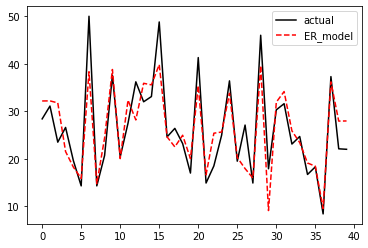

In [10]:
plt.plot(y_test[:40],'k-',label='actual')
plt.plot(y_model[:40],'r--',label='ER_model')
#plt.plot(y_pred[:40],'b--',label='ER_pred')
plt.legend()

## Comparing with Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

In [12]:
MSE_linear = ((y_test - y_pred_linear)**2).mean()
print('Linear Regression:', MSE_linear)

Linear Regression: 34.413968453138445


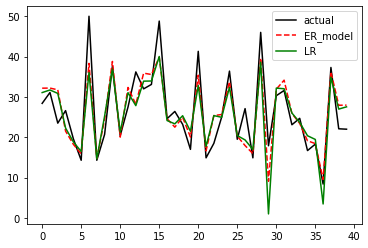

In [13]:
plt.plot(y_test[:40],'k-',label='actual')
plt.plot(y_model[:40],'r--',label='ER_model')
#plt.plot(y_pred[:40],'b--',label='ER_pred')
plt.plot(y_pred_linear[:40],'g-',label='LR')
plt.legend()